In [9]:
import pandas as pd
import os
import numpy as np
import sys
sys.path.append("../")
sys.path.append("../..")


In [10]:
start_time = "2020-11-25 00:00:00"
end_time ="2022-12-08 00:00:00"
intDataInfo= { "db_info":[ 
    {"db_name":"farm_outdoor_weather", "measurement":"seoul", "start":start_time, "end":end_time},
    {"db_name":"finance_korean_stock", "measurement":"stock","tag_key":"company", "tag_value":"AJ네트웍스", "start":start_time, "end":end_time}
]}  

In [11]:
integrationFreq_min= 30
integration_freq_sec = 60 * integrationFreq_min# 분

## 1. Simple Integration

IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
3600.0
1296000.0
[3600, 1296000]
self.refine_param ::  {'removeDuplication': {'flag': False}, 'staticFrequency': {'flag': False, 'frequency': None}}
Refining-----End
OutlierProcessing-----End
Imputation-----End
Refining-----End
OutlierProcessing-----End
Imputation-----End


<AxesSubplot:xlabel='datetime'>

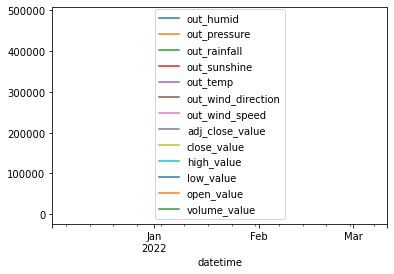

In [12]:
##### Preprocessing Parameter ######################################################################################
# 1. No Cleaning
refine_param = {
    "removeDuplication":{"flag":False},
    "staticFrequency":{"flag":False, "frequency":None}
}
CertainParam= {'flag': False}
uncertainParam= {'flag': False, "param":{}}
outlier_param ={
    "certainErrorToNaN":CertainParam, 
    "unCertainErrorToNaN":uncertainParam
}
imputation_param = {
    "serialImputation":{
        "flag":False,
        "imputation_method":[],
        "totalNonNanRatio":80
    }
}

NoCleanprocess_param = {'refine_param':refine_param, 'outlier_param':outlier_param, 'imputation_param':imputation_param}
integration_param = {
    "granularity_sec":integration_freq_sec,
    "param":{},
    "method":"simple"
}
##################################################################################################################
process_param = NoCleanprocess_param # or CleanProcessParam
from KETIPreDataIngestion.KETI_setting import influx_setting_KETI as ins
from KETIPreDataIngestion.data_influx import influx_Client
db_client = influx_Client.influxClient(ins.CLUSTDataServer)

from KETIPreDataIntegration.clustDataIntegration import ClustIntegration
Result = ClustIntegration().clustIntegrationFromInfluxSource(db_client, intDataInfo, process_param,integration_param)
Result.plot()

## 2. AutomaticCleanIntegration

IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
IntType
3600.0
1296000.0
[3600, 1296000]
self.refine_param ::  {'removeDuplication': {'flag': True}, 'staticFrequency': {'flag': True, 'frequency': None}}
Refining-----End
OutlierProcessing-----End
Imputation-----End
Refining-----End
OutlierProcessing-----End
Imputation-----End
{'out_humid': <function mean at 0x7fc53412ef70>, 'out_pressure': <function mean at 0x7fc53412ef70>, 'out_rainfall': <function mean at 0x7fc53412ef70>, 'out_sunshine': <function mean at 0x7fc53412ef70>, 'out_temp': <function mean at 0x7fc53412ef70>, 'out_wind_direction': <function mean at 0x7fc53412ef70>, 'out_wind_speed': <function mean at 0x7fc53412ef70>, 'adj_close_value': <function mean at 0x7fc53412ef70>, 'close_value': <function mean at 0x7fc53412ef70>, 'high_value': <function mean at 0x7fc53412ef70>, 'low_value': <function mean at 0x7fc53412ef70>, 'open_value': <function mean at 0x7fc53412ef70>, 'volume_value': 

<AxesSubplot:xlabel='datetime'>

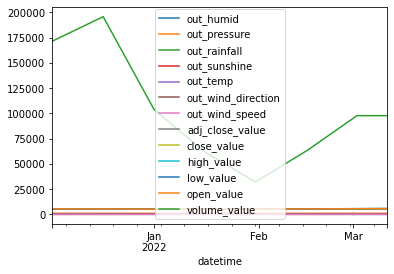

In [13]:
#################################################### 2. Cleaning
refine_param = {
"removeDuplication":{"flag":True},
"staticFrequency":{"flag":True, "frequency":None}
}
CertainParam= {'flag': True}
uncertainParam= {'flag': False, "param":{
          "outlierDetectorConfig":[
                {'algorithm': 'IQR', 'percentile':99 ,'alg_parameter': {'weight':100}}    
]}}
outlier_param ={
    "certainErrorToNaN":CertainParam, 
    "unCertainErrorToNaN":uncertainParam
}
imputation_param = {
    "serialImputation":{
        "flag":False,
        "imputation_method":[{"min":0,"max":3,"method":"linear", "parameter":{}}],
        "totalNonNanRatio":80
    }
}

Cleanprocess_param = {'refine_param':refine_param, 'outlier_param':outlier_param, 'imputation_param':imputation_param}
process_param = Cleanprocess_param # or CleanProcessParam
integration_param = {
    "granularity_sec":integration_freq_sec,
    "param":{},
    "method":"meta"
}
####################################################
Result = ClustIntegration().clustIntegrationFromInfluxSource(db_client, intDataInfo, process_param,integration_param)
Result.plot()